In [1]:
from simi.args import *
from simi.Hamiltonian_helper import *

T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
14.142135623730953 kHz


In [2]:

def rect(t, width):
    return np.heaviside(t + width/2, 0) - np.heaviside(t - width/2, 0)


def echo(t):
    return 1-2*np.heaviside(t, 0)

In [3]:
pulse_length = qubit_args['pulse_length']
strech = 20*pulse_length
ts = np.linspace(-strech/2, strech/2, 50000)



In [4]:
qubit_args['cutoff'] = 1e-2

lorentzian_vec = rect(ts, pulse_length)*lorentzian(ts, qubit_args)
square_half = 0.1*rect(ts, pulse_length*1.2)

lorentzian_echo_vec = echo(ts)*lorentzian_vec
square_echo = echo(ts)*square_half

In [5]:
# fucn of fourier transform
def fourier_transform(t, signal):
    dt = t[1] - t[0]
    N = len(t)
    freq = np.fft.fftfreq(N, dt)
    signal_ft = np.fft.fft(signal) * dt
    return freq, signal_ft

In [6]:


def plot_time_domain(ax):
    ax.plot(ts/us, square_half, label='Square',
            color='C1', linestyle='--')
    ax.plot(ts/us, lorentzian_vec, label='Lorentzian', color='C0')
    ax.set_title('Time Domain')
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(-2.1, 2.1)
    ax.set_xlim(-pulse_length/2*1.8/us, pulse_length/2*1.8/us)
    ax.legend()


def plot_frequency_domain(ax):
    freq_square, square_ft = fourier_transform(ts, square_half)
    freq_lorentzian, lorentzian_ft = fourier_transform(ts, lorentzian_vec)

    ax.plot(freq_square/1e6, np.abs(square_ft), label='Square',
            color='C1', linestyle='--')
    ax.plot(freq_lorentzian/1e6, np.abs(lorentzian_ft),
            label='Lorentzian', color='C0')
    ax.set_title('Frequency Domain')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel('Magnitude')
    ax.set_xlim(-0.3, 0.3)
    ax.legend()


def plot_time_domain_echo(ax):
    ax.plot(ts/us, square_echo, label='Square Echo',
            color='C1', linestyle='--')
    ax.plot(ts/us, lorentzian_echo_vec, label='Lorentzian Echo', color='C0')
    ax.set_title('Time Domain with Echo')
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(-2.1, 2.1)
    ax.set_xlim(-pulse_length/2*1.8/us, pulse_length/2*1.8/us)

    ax.legend()


def plot_frequency_domain_echo(ax):
    freq_square_echo, square_echo_ft = fourier_transform(ts, square_echo)
    freq_lorentzian_echo, lorentzian_echo_ft = fourier_transform(
        ts, lorentzian_echo_vec)

    ax.plot(freq_square_echo/MHz, np.abs(square_echo_ft), label='Square Echo',
            color='C1', linestyle='--')
    ax.plot(freq_lorentzian_echo/MHz, np.abs(lorentzian_echo_ft),
            label='Lorentzian Echo', color='C0')
    ax.set_title('Frequency Domain with Echo')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel('Magnitude')
    ax.set_xlim(-0.3, 0.3)
    ax.legend(loc='upper right')

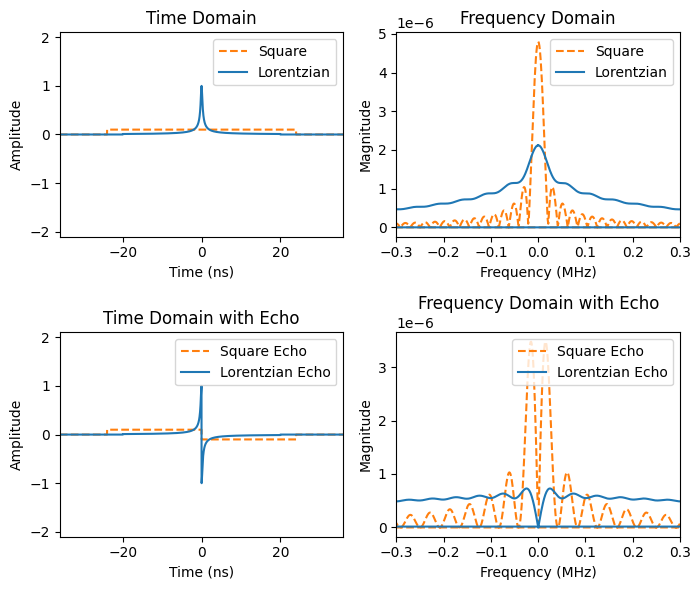

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(7, 6))


plot_time_domain(axs[0,0])
plot_frequency_domain(axs[0,1])
plot_time_domain_echo(axs[1,0])
plot_frequency_domain_echo(axs[1,1])

plt.tight_layout()

plt.savefig('fourier_v2.png', dpi=300)